<a href="https://colab.research.google.com/github/tanvi1911/Feature_Scaling_Standardization/blob/main/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_For_Practice/Social_Network_Ads.csv')

In [11]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
239,15772073,Female,53,143000,1
269,15583137,Male,40,61000,0
282,15750447,Male,37,70000,1
313,15753861,Female,49,141000,1
217,15582066,Male,40,78000,0


In [12]:
df = df.iloc[:,2:]

In [13]:
df.sample(5)

,Age,EstimatedSalary,Purchased
32,21,16000,0
349,38,61000,0
155,31,15000,0
207,52,114000,0
216,49,65000,0


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state = 0)


In [15]:
X_train.shape

(280, 2)

In [16]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [17]:
X_test.shape

(120, 2)

In [18]:
X_test.head()

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [19]:
y_train.head()

92     0
223    1
234    0
232    1
377    0
Name: Purchased, dtype: int64

# Standard Scalar

In [20]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [21]:
#by fitting the X_train set, it will learn the parameters
scalar.fit(X_train)

StandardScaler()

In [22]:
#transforming both the train and test set
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [25]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [28]:
X_train_scaled          #results in numpy array

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [30]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [31]:
np.round(X_train.describe(), 1)
#here check the mean of original dataset

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [33]:
np.round(X_train_scaled.describe(), 1)
#here check the mean of scaled dataset which should be 0

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## What exactly happened after scaling

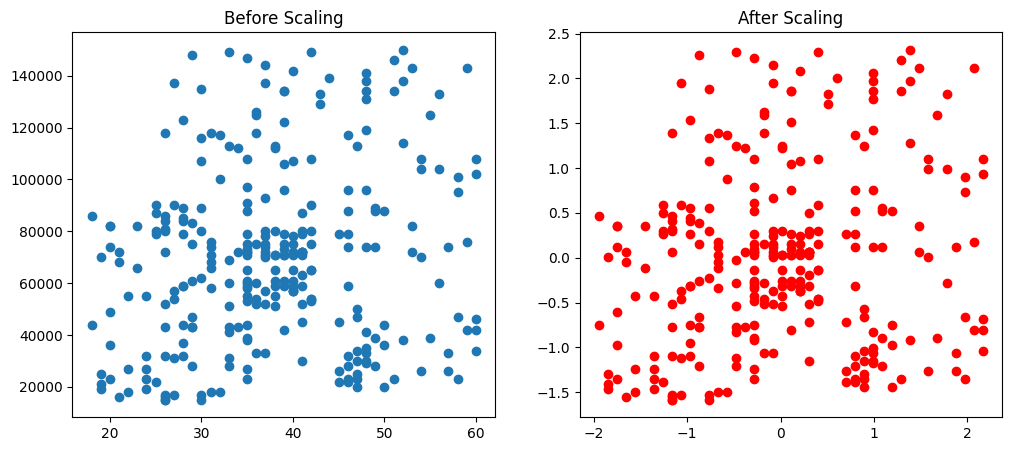

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

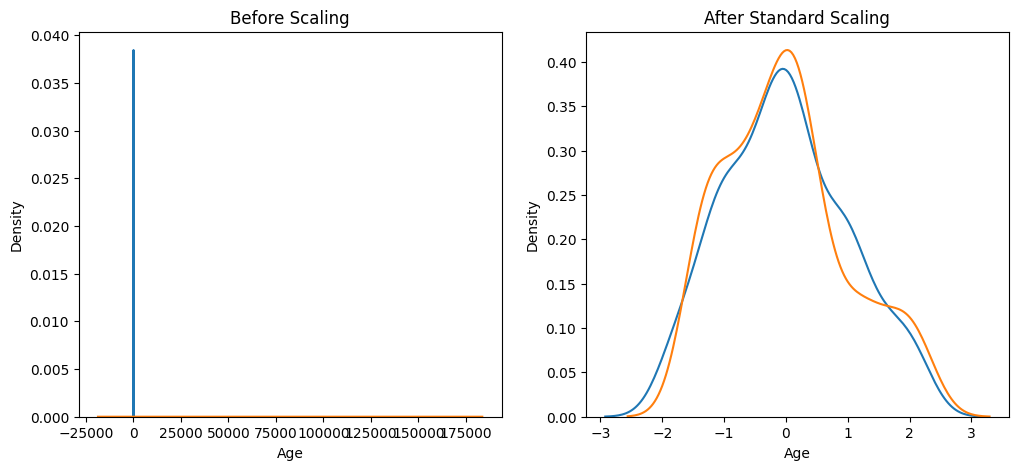

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

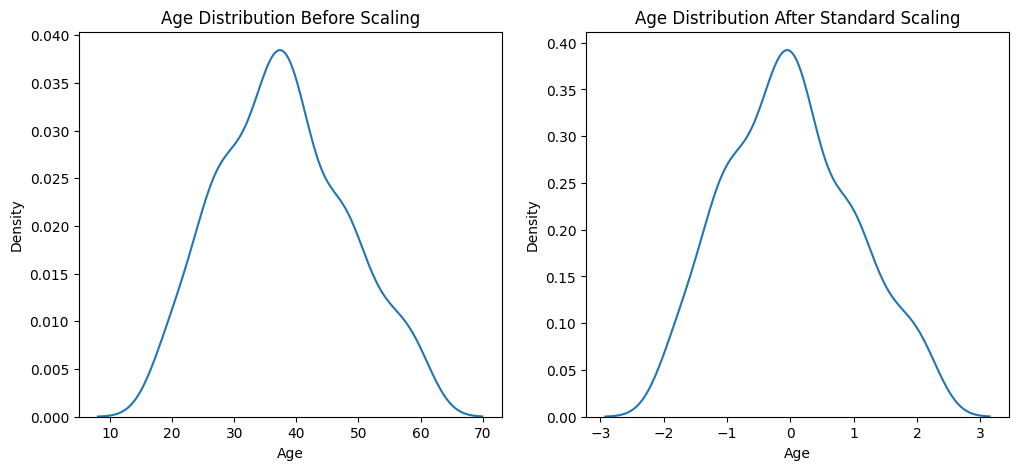

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

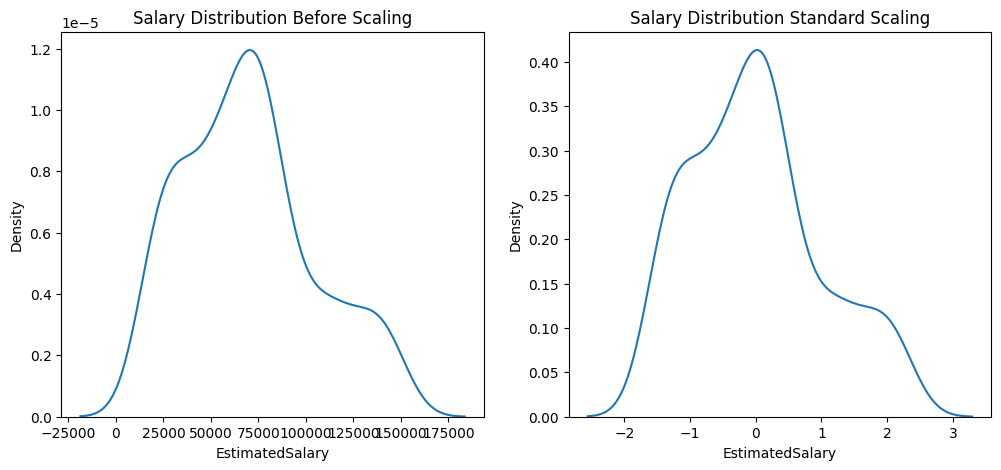

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Applying scaling in logistic regression algorithm

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [44]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [45]:
lr_pred = lr.predict(X_test)
lr_pred_scaled = lr_scaled.predict(X_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print("Actual: ", accuracy_score(y_test,lr_pred))
print("Scaled: ", accuracy_score(y_test,lr_pred_scaled))

Actual:  0.6583333333333333
Scaled:  0.8666666666666667


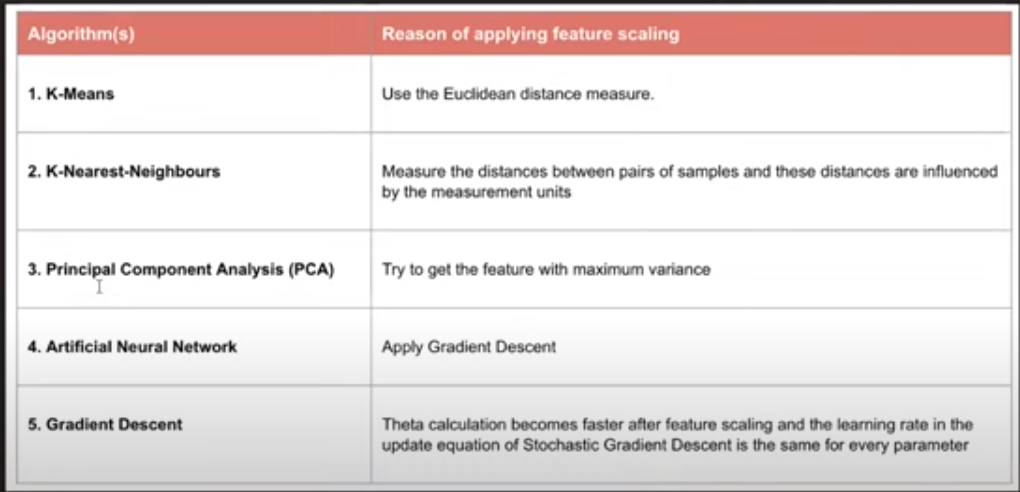